In [1]:
import pickle
import matplotlib.pyplot as plt
from data import *

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
file_path = "Desktop/eeg2text/dataset/pickle/task2-NR-2.0/task2-NR-2.0-dataset.pickle"

In [3]:
with open(file_path, 'rb') as f:
    obj = pickle.load(f)

In [4]:
obj.keys()

dict_keys(['YSD', 'YDR', 'YRK', 'YFS', 'YAG', 'YIS', 'YLS', 'YRH', 'YHS', 'YMS', 'YSL', 'YDG', 'YFR', 'YRP', 'YTL', 'YAC', 'YAK', 'YMD'])

In [5]:
len(obj["YAC"]) ## contains all the snetence showsn to this subject as a list of dicts

349

In [6]:
obj["YAC"][0].keys() ## contains sentence and word level data for that particular subject

dict_keys(['content', 'sentence_level_EEG', 'word', 'word_tokens_has_fixation', 'word_tokens_with_mask', 'word_tokens_all'])

In [7]:
obj["YAC"][0]

{'content': 'Henry Ford, with his son Edsel, founded the Ford Foundation in 1936 as a local philanthropic organization with a broad charter to promote human welfare.',
 'sentence_level_EEG': {'mean_t1': array([0.16782421, 0.31163304, 0.3822592 , 0.46375168, 0.37222443,
         0.32346915, 0.25067416, 0.39453562, 0.45549044, 0.52262315,
         0.53807189, 1.04620028, 0.51752684, 0.45947536, 0.40076587,
         0.41869917, 0.4072233 , 0.44303144, 0.46753961, 0.27654834,
         0.38672898, 0.49433275, 0.62065636, 0.64481009, 0.70351887,
         0.38096081, 0.61542049, 0.67610298, 0.66891079, 0.71094999,
         0.22493291, 0.84830338, 0.92607282, 0.75758105, 0.70084919,
         0.35107811, 0.36147891, 0.99348991, 0.79561606, 0.74472576,
         1.01820685, 0.78240548, 0.78633821, 0.78990016, 1.04435186,
         0.56293231, 1.1200813 , 1.00225038, 0.95847176, 0.97150855,
         1.03453741, 1.40481664, 1.01790543, 1.23475415, 1.07724571,
         1.16370955, 1.08590871, 1.32557

In [8]:
x = []
for sub in obj.keys():
    for i in range(len(obj[sub])):
        try: 
            x.append(len(obj[sub][i]['content'].split(" ")))
        except:
            pass

In [9]:
max(x), len(x)

(53, 5990)

(array([ 474., 1306., 1615., 1126.,  514.,  574.,  138.,  123.,   50.,
          70.]),
 array([ 5. ,  9.8, 14.6, 19.4, 24.2, 29. , 33.8, 38.6, 43.4, 48.2, 53. ]),
 <BarContainer object of 10 artists>)

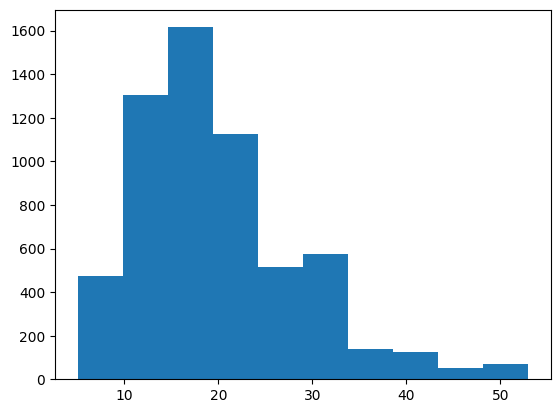

In [10]:
plt.hist(x)

In [ ]:
whole_dataset_dicts = []
    
# dataset_path_task1 = '/shared/nas/data/m1/wangz3/SAO_project/SAO/dataset/ZuCo/task1-SR/pickle/task1-SR-dataset-with-tokens_6-25.pickle' 
# with open(dataset_path_task1, 'rb') as handle:
#     whole_dataset_dicts.append(pickle.load(handle))

# dataset_path_task2 = '/shared/nas/data/m1/wangz3/SAO_project/SAO/dataset/ZuCo/task2-NR/pickle/task2-NR-dataset-with-tokens_7-10.pickle' 
# with open(dataset_path_task2, 'rb') as handle:
#     whole_dataset_dicts.append(pickle.load(handle))

# dataset_path_task3 = '/shared/nas/data/m1/wangz3/SAO_project/SAO/dataset/ZuCo/task3-TSR/pickle/task3-TSR-dataset-with-tokens_7-10.pickle' 
# with open(dataset_path_task3, 'rb') as handle:
#     whole_dataset_dicts.append(pickle.load(handle))

dataset_path_task2_v2 = '/Desktop/eeg2text/dataset/pickle/task2-NR-2.0/task2-NR-2.0-dataset.pickle' 
with open(dataset_path_task2_v2, 'rb') as handle:
    whole_dataset_dicts.append(pickle.load(handle))

print()
for key in whole_dataset_dicts[0]:
    print(f'task2_v2, sentence num in {key}:',len(whole_dataset_dicts[0][key]))
print()

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
dataset_setting = 'unique_sent'
subject_choice = 'ALL'
print(f'![Debug]using {subject_choice}')
eeg_type_choice = 'GD'
print(f'[INFO]eeg type {eeg_type_choice}') 
bands_choice = ['_t1','_t2','_a1','_a2','_b1','_b2','_g1','_g2'] 
print(f'[INFO]using bands {bands_choice}')
train_set = ZuCo_dataset(whole_dataset_dicts, 'train', tokenizer, subject = subject_choice, eeg_type = eeg_type_choice, bands = bands_choice, setting = dataset_setting)
dev_set = ZuCo_dataset(whole_dataset_dicts, 'dev', tokenizer, subject = subject_choice, eeg_type = eeg_type_choice, bands = bands_choice, setting = dataset_setting)
test_set = ZuCo_dataset(whole_dataset_dicts, 'test', tokenizer, subject = subject_choice, eeg_type = eeg_type_choice, bands = bands_choice, setting = dataset_setting)

print('trainset size:',len(train_set))
print(train_set)
print(f"One element at index 0 : {train_set[0]}")
print('devset size:',len(dev_set))
print('testset size:',len(test_set))


task2_v2, sentence num in YSD: 349
task2_v2, sentence num in YDR: 349
task2_v2, sentence num in YRK: 349
task2_v2, sentence num in YFS: 349
task2_v2, sentence num in YAG: 349
task2_v2, sentence num in YIS: 349
task2_v2, sentence num in YLS: 349
task2_v2, sentence num in YRH: 349
task2_v2, sentence num in YHS: 349
task2_v2, sentence num in YMS: 349
task2_v2, sentence num in YSL: 349
task2_v2, sentence num in YDG: 349
task2_v2, sentence num in YFR: 349
task2_v2, sentence num in YRP: 349
task2_v2, sentence num in YTL: 349
task2_v2, sentence num in YAC: 349
task2_v2, sentence num in YAK: 349
task2_v2, sentence num in YMD: 349

![Debug]using ALL
[INFO]eeg type GD
[INFO]using bands ['_t1', '_t2', '_a1', '_a2', '_b1', '_b2', '_g1', '_g2']
[INFO]loading 1 task datasets
[INFO]using subjects:  ['YSD', 'YDR', 'YRK', 'YFS', 'YAG', 'YIS', 'YLS', 'YRH', 'YHS', 'YMS', 'YSL', 'YDG', 'YFR', 'YRP', 'YTL', 'YAC', 'YAK', 'YMD']
train divider = 279
dev divider = 313
[INFO]initializing a train set...
Sente

In [12]:
train_set[3]

{'word_embeddings': tensor([[-1.2507, -0.7313, -0.5455,  ...,  0.1944,  0.9439, -1.6777],
         [-1.1453, -0.9932, -0.8073,  ..., -0.0602,  0.4854, -1.3276],
         [-0.9782, -0.9378, -0.8430,  ..., -0.0989,  0.5263, -1.5625],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
        dtype=torch.float64),
 'target_wordLevel_strings': ['this',
  'period,',
  'personally',
  'drove',
  'his',
  'Quadricycle',
  'victory',
  'in',
  'a',
  'race',
  'against',
  'Alexander',
  'Winton,',
  'well-known',
  'driver',
  'the',
  'heavy',
  'favorite',
  'October',
  '1901.'],
 'seq_len': 20,
 'input_attn_mask': tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.